In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_train = pd.read_csv('train.csv', nrows=20000, parse_dates=["pickup_datetime"]) #parse_dates may improve parsing speed

df_train.head();

In [54]:
df_train.dtypes

key                               object
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [55]:
df_train.describe()



fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
count  20000.000000      20000.000000     20000.000000       20000.000000   
mean      11.303321        -72.478584        39.921043         -72.497221   
std        9.541637         10.525376         6.678592          10.460530   
min       -3.000000        -74.438233       -74.006893         -84.654241   
25%        6.000000        -73.992150        40.734706         -73.991224   
50%        8.500000        -73.981711        40.752680         -73.980217   
75%       12.500000        -73.966802        40.767443         -73.963729   
max      180.000000         40.766125       401.083332          40.802437   

       dropoff_latitude  passenger_count  
count      20000.000000     20000.000000  
mean          39.913606         1.658000  
std            6.139231         1.283674  
min          -74.006377         0.000000  
25%           40.734537         1.000000  
50%           40.753583         1.000000  
75%           40.768135         2.000000  
max           41.366138         6.000000

In [56]:
print('old size: ', len(df_train))
df_train = df_train[df_train.fare_amount>=0]
print('new size: ', len(df_train))

old size:  20000
new size:  19997


Text(0.5, 1.0, 'Histogram')

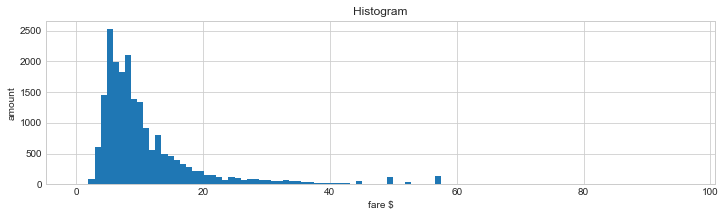

In [57]:
#% matplotlib inline

df_train[df_train.fare_amount<100].fare_amount.hist(bins=100, figsize=(12,3))
plt.xlabel('fare $')
plt.ylabel('amount')
plt.title('Histogram')

In [58]:
print(df_train.isnull().sum())
#df_train = df_train.dropna(how = 'any', axis = 'rows') drop if there's null

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


In [59]:
df_test = pd.read_csv('test.csv');
df_test.head()

key          pickup_datetime  pickup_longitude  \
0  2015-01-27 13:08:24.0000002  2015-01-27 13:08:24 UTC        -73.973320   
1  2015-01-27 13:08:24.0000003  2015-01-27 13:08:24 UTC        -73.986862   
2  2011-10-08 11:53:44.0000002  2011-10-08 11:53:44 UTC        -73.982524   
3  2012-12-01 21:12:12.0000002  2012-12-01 21:12:12 UTC        -73.981160   
4  2012-12-01 21:12:12.0000003  2012-12-01 21:12:12 UTC        -73.966046   

   pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  
0        40.763805         -73.981430         40.743835                1  
1        40.719383         -73.998886         40.739201                1  
2        40.751260         -73.979654         40.746139                1  
3        40.767807         -73.990448         40.751635                1  
4        40.789775         -73.988565         40.744427                1

In [60]:
df_test.describe()

pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
count       9914.000000      9914.000000        9914.000000       9914.000000   
mean         -73.974722        40.751041         -73.973657         40.751743   
std            0.042774         0.033541           0.039072          0.035435   
min          -74.252193        40.573143         -74.263242         40.568973   
25%          -73.992501        40.736125         -73.991247         40.735254   
50%          -73.982326        40.753051         -73.980015         40.754065   
75%          -73.968013        40.767113         -73.964059         40.768757   
max          -72.986532        41.709555         -72.990963         41.696683   

       passenger_count  
count      9914.000000  
mean          1.671273  
std           1.278747  
min           1.000000  
25%           1.000000  
50%           1.000000  
75%           2.000000  
max           6.000000

In [61]:
min(df_test.pickup_longitude.min(), df_test.dropoff_longitude.min()), \
max(df_test.pickup_longitude.max(), df_test.dropoff_longitude.max())

(-74.263242, -72.986532)

In [62]:
min(df_test.pickup_latitude.min(), df_test.dropoff_latitude.min()), \
max(df_test.pickup_latitude.max(), df_test.dropoff_latitude.max())

(40.568973, 41.709555)

In [68]:
def select_within_boundingbox(df, box):
    return (df.pickup_longitude >= box[0]) & (df.pickup_longitude <= box[1]) & \
           (df.pickup_latitude >= box[2]) & (df.pickup_latitude <= box[3]) & \
           (df.dropoff_longitude >= box[0]) & (df.dropoff_longitude <= box[1]) & \
           (df.dropoff_latitude >= box[2]) & (df.dropoff_latitude <= box[3])

# NYC map
box = (-74.2, -72.8, 40.5, 41.8)

In [69]:
print('old size: ', len(df_train))
df_train = df_train[select_within_boundingbox(df_train, box)]
print('new size: ', len(df_train))

old size:  19545
new size:  19545


In [70]:
nyc_map = plt.imread('https://aiblog.nl/download/nyc_-74.5_-72.8_40.5_41.8.png')

# load extra image to zoom in on NYC
BB_zoom = (-74.3, -73.7, 40.5, 40.9)
nyc_map_zoom = plt.imread('https://aiblog.nl/download/nyc_-74.3_-73.7_40.5_40.9.png')

In [74]:
def plot_on_map(df, BB, nyc_map, s=10, alpha=0.2):
    fig, axs = plt.subplots(1, 2, figsize=(16,10)) # nrows=1, ncols=2
    axs[0].scatter(df.pickup_longitude, df.pickup_latitude, zorder=1, alpha=alpha, c='r', s=s)
    axs[0].set_xlim((BB[0], BB[1]))
    axs[0].set_ylim((BB[2], BB[3]))
    axs[0].set_title('Pickup locations')
    axs[0].imshow(nyc_map, zorder=0, extent=box)

    axs[1].scatter(df.dropoff_longitude, df.dropoff_latitude, zorder=1, alpha=alpha, c='r', s=s)
    axs[1].set_xlim((BB[0], BB[1]))
    axs[1].set_ylim((BB[2], BB[3]))
    axs[1].set_title('Dropoff locations')
    axs[1].imshow(nyc_map, zorder=0, extent=box)

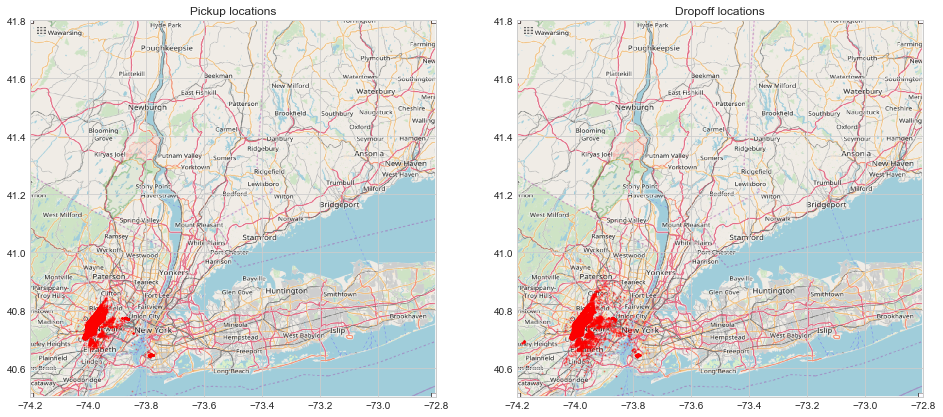

In [75]:
plot_on_map(df_train, box, nyc_map, s=1, alpha=0.3)

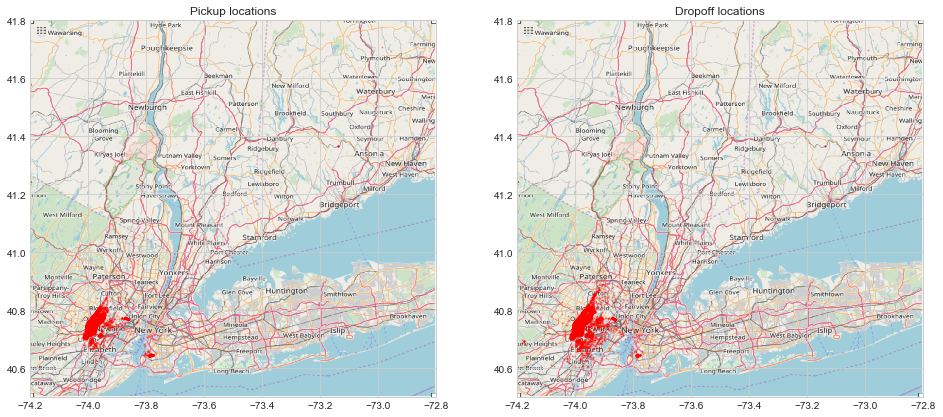

In [76]:
plot_on_map(df_test, box, nyc_map, s=1, alpha=0.3)

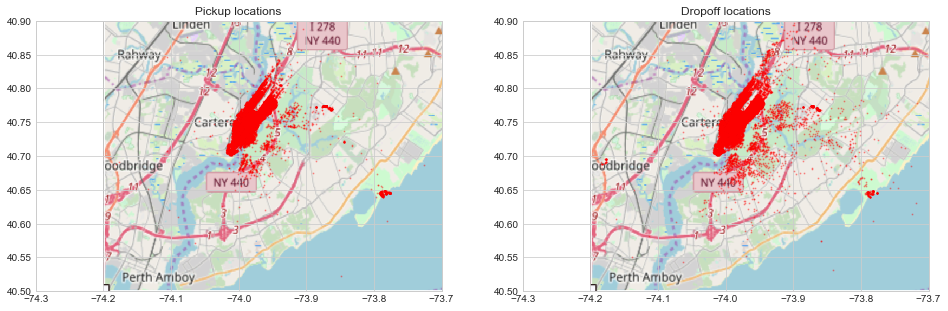

In [78]:
plot_on_map(df_train, BB_zoom, nyc_map_zoom, s=1, alpha=0.3)

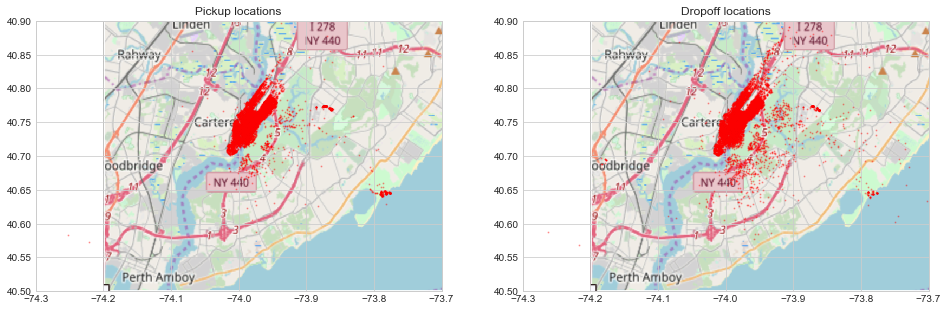

In [79]:
plot_on_map(df_test, BB_zoom, nyc_map_zoom, s=1, alpha=0.3)

In [80]:
def plot_hires(df, BB, figsize=(12, 12), ax=None, c=('r', 'b')):
    if ax == None:
        fig, ax = plt.subplots(1, 1, figsize=figsize)

    idx = select_within_boundingbox(df, BB)
    ax.scatter(df[idx].pickup_longitude, df[idx].pickup_latitude, c=c[0], s=0.01, alpha=0.5)
    ax.scatter(df[idx].dropoff_longitude, df[idx].dropoff_latitude, c=c[1], s=0.01, alpha=0.5)

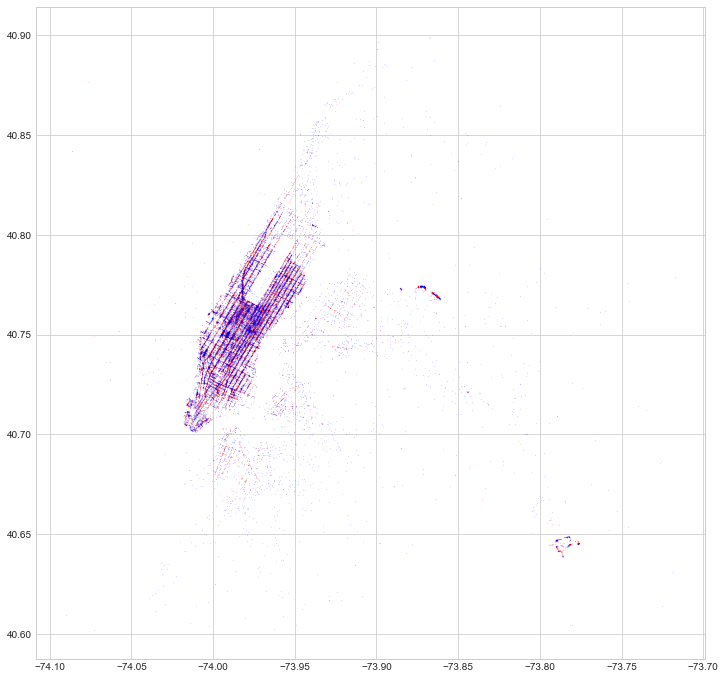

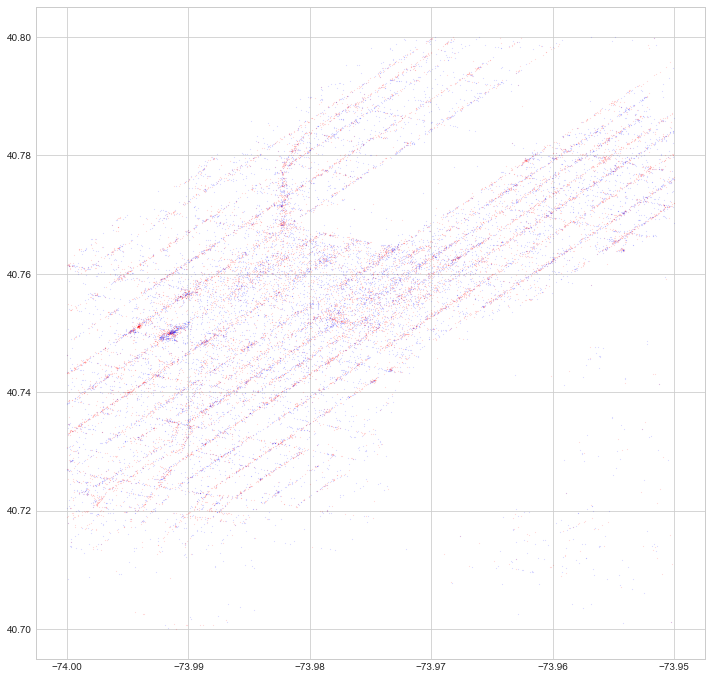

In [81]:
plot_hires(df_train, (-74.1, -73.7, 40.6, 40.9))
plot_hires(df_train, (-74, -73.95, 40.7, 40.8))

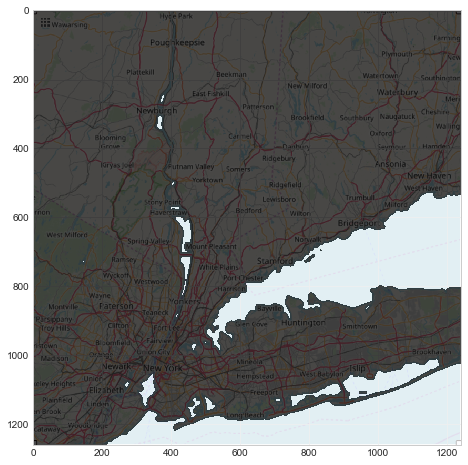

In [84]:
nyc_mask = plt.imread('https://aiblog.nl/download/nyc_mask-74.5_-72.8_40.5_41.8.png')[:,:,0] > 0.9

plt.figure(figsize=(8,8))
plt.imshow(nyc_map, zorder=0)
plt.imshow(nyc_mask, zorder=1, alpha=0.7); # note: True is show in black, False in white.

In [85]:
BB = box

In [86]:
def lonlat_to_xy(longitude, latitude, dx, dy, BB):
    return (dx*(longitude - BB[0])/(BB[1]-BB[0])).astype('int'), \
           (dy - dy*(latitude - BB[2])/(BB[3]-BB[2])).astype('int')

In [87]:
pickup_x, pickup_y = lonlat_to_xy(df_train.pickup_longitude, df_train.pickup_latitude, 
                                  nyc_mask.shape[1], nyc_mask.shape[0], BB)
dropoff_x, dropoff_y = lonlat_to_xy(df_train.dropoff_longitude, df_train.dropoff_latitude, 
                                  nyc_mask.shape[1], nyc_mask.shape[0], BB)

In [88]:
idx = (nyc_mask[pickup_y, pickup_x] & nyc_mask[dropoff_y, dropoff_x])
print("Number of trips in water: {}".format(np.sum(~idx)))

Number of trips in water: 20


In [89]:
# remove data point from water
def remove_datapoints_from_water(df):
    def lonlat_to_xy(longitude, latitude, dx, dy, BB):
        return (dx*(longitude - BB[0])/(BB[1]-BB[0])).astype('int'), \
               (dy - dy*(latitude - BB[2])/(BB[3]-BB[2])).astype('int')

    # define bounding box
    BB = (-74.5, -72.8, 40.5, 41.8)
    
    # read nyc mask and turn into boolean map with
    # land = True, water = False
    nyc_mask = plt.imread('https://aiblog.nl/download/nyc_mask-74.5_-72.8_40.5_41.8.png')[:,:,0] > 0.9
    
    # calculate for each lon,lat coordinate the xy coordinate in the mask map
    pickup_x, pickup_y = lonlat_to_xy(df.pickup_longitude, df.pickup_latitude, 
                                      nyc_mask.shape[1], nyc_mask.shape[0], BB)
    dropoff_x, dropoff_y = lonlat_to_xy(df.dropoff_longitude, df.dropoff_latitude, 
                                      nyc_mask.shape[1], nyc_mask.shape[0], BB)    
    # calculate boolean index
    idx = nyc_mask[pickup_y, pickup_x] & nyc_mask[dropoff_y, dropoff_x]
    
    # return only datapoints on land
    return df[idx]

In [90]:
print('old size: ', len(df_train))
df_train = remove_datapoints_from_water(df_train)
print('new size: ', len(df_train))

old size:  19545
new size:  19541


In [92]:
# For this plot and further analysis, we need a function to calculate the distance in miles between locations in lon,lat coordinates.
# This function is based on https://stackoverflow.com/questions/27928/
# calculate-distance-between-two-latitude-longitude-points-haversine-formula 
# return distance in miles
def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295 # Pi/180
    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a)) # 2*R*asin...

# First calculate two arrays with datapoint density per sq mile
n_lon, n_lat = 200, 200 # number of grid bins per longitude, latitude dimension
density_pickup, density_dropoff = np.zeros((n_lat, n_lon)), np.zeros((n_lat, n_lon)) # prepare arrays

# To calculate the number of datapoints in a grid area, the numpy.digitize() function is used. 
# This function needs an array with the (location) bins for counting the number of datapoints
# per bin.
bins_lon = np.zeros(n_lon+1) # bin
bins_lat = np.zeros(n_lat+1) # bin
delta_lon = (BB[1]-BB[0]) / n_lon # bin longutide width
delta_lat = (BB[3]-BB[2]) / n_lat # bin latitude height
bin_width_miles = distance(BB[2], BB[1], BB[2], BB[0]) / n_lon # bin width in miles
bin_height_miles = distance(BB[3], BB[0], BB[2], BB[0]) / n_lat # bin height in miles
for i in range(n_lon+1):
    bins_lon[i] = BB[0] + i * delta_lon
for j in range(n_lat+1):
    bins_lat[j] = BB[2] + j * delta_lat
    
# Digitize per longitude, latitude dimension
inds_pickup_lon = np.digitize(df_train.pickup_longitude, bins_lon)
inds_pickup_lat = np.digitize(df_train.pickup_latitude, bins_lat)
inds_dropoff_lon = np.digitize(df_train.dropoff_longitude, bins_lon)
inds_dropoff_lat = np.digitize(df_train.dropoff_latitude, bins_lat)

# Count per grid bin
# note: as the density_pickup will be displayed as image, the first index is the y-direction, 
#       the second index is the x-direction. Also, the y-direction needs to be reversed for
#       properly displaying (therefore the (n_lat-j) term)
dxdy = bin_width_miles * bin_height_miles
for i in range(n_lon):
    for j in range(n_lat):
        density_pickup[j, i] = np.sum((inds_pickup_lon==i+1) & (inds_pickup_lat==(n_lat-j))) / dxdy
        density_dropoff[j, i] = np.sum((inds_dropoff_lon==i+1) & (inds_dropoff_lat==(n_lat-j))) / dxdy

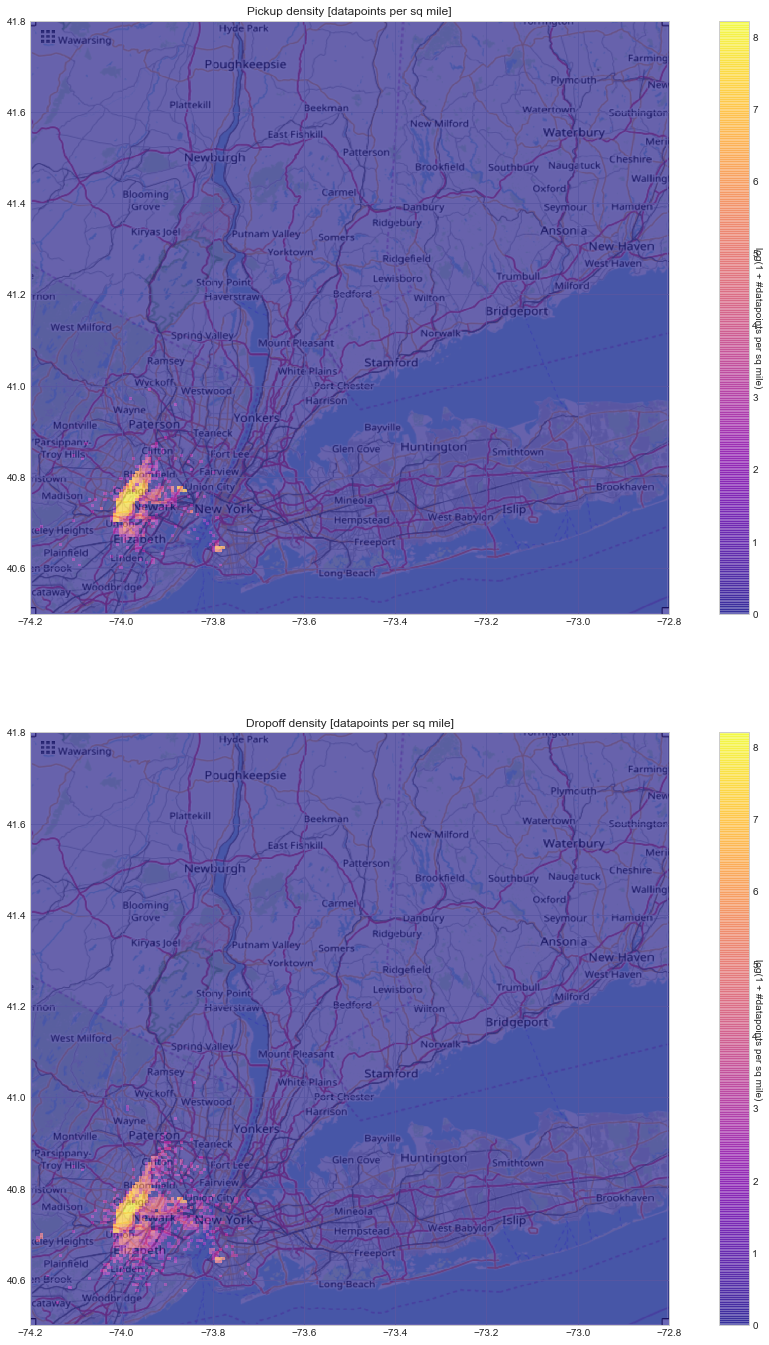

In [93]:
# Plot the density arrays
fig, axs = plt.subplots(2, 1, figsize=(18, 24))
axs[0].imshow(nyc_map, zorder=0, extent=BB);
im = axs[0].imshow(np.log1p(density_pickup), zorder=1, extent=BB, alpha=0.6, cmap='plasma')
axs[0].set_title('Pickup density [datapoints per sq mile]')
cbar = fig.colorbar(im, ax=axs[0])
cbar.set_label('log(1 + #datapoints per sq mile)', rotation=270)

axs[1].imshow(nyc_map, zorder=0, extent=BB);
im = axs[1].imshow(np.log1p(density_dropoff), zorder=1, extent=BB, alpha=0.6, cmap='plasma')
axs[1].set_title('Dropoff density [datapoints per sq mile]')
cbar = fig.colorbar(im, ax=axs[1])
cbar.set_label('log(1 + #datapoints per sq mile)', rotation=270)

In [94]:
#Pickup traffic density

# add time information
df_train['year'] = df_train.pickup_datetime.apply(lambda t: t.year)
df_train['weekday'] = df_train.pickup_datetime.apply(lambda t: t.weekday())
df_train['hour'] = df_train.pickup_datetime.apply(lambda t: t.hour)

D:\programFile\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
D:\programFile\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
D:\programFile\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org

In [95]:
# some constants needed to calculate pickup traffic density
n_hours = 24
n_weekdays = 7
n_years = 7
n_bins_lon = 30
n_bins_lat = 30

# focus on traffic in Manhattan
BB_traffic = (-74.025, -73.925, 40.7, 40.8)

# define function to calculate pickup traffic density
def calculate_trafic_density(df):
    traffic = np.zeros((n_years, n_weekdays, n_hours, n_bins_lat, n_bins_lon))
    
    # To calculate the number of datapoints in a grid area, the numpy.digitize() function is used. 
    # This function needs an array with the (location) bins for counting the number of datapoints
    # per bin.
    bins_lon = np.zeros(n_bins_lon+1) # bin
    bins_lat = np.zeros(n_bins_lat+1) # bin
    
    delta_lon = (BB_traffic[1]-BB_traffic[0]) / n_bins_lon # bin longutide width
    delta_lat = (BB_traffic[3]-BB_traffic[2]) / n_bins_lat # bin latitude height
    
    for i in range(n_bins_lon+1):
        bins_lon[i] = BB_traffic[0] + i * delta_lon
    for j in range(n_bins_lat+1):
        bins_lat[j] = BB_traffic[2] + j * delta_lat
    
    # Count per grid bin
    # note: as the density_pickup will be displayed as image, the first index is the y-direction, 
    #       the second index is the x-direction. Also, the y-direction needs to be reversed for
    #       properly displaying (therefore the (n_lat-j) term)
    for y in range(n_years):
        for d in range(n_weekdays):
            for h in range(n_hours):
                idx = (df.year==(2009+y)) & (df.weekday==d) & (df.hour==h)

                # Digitize per longitude, latitude dimension
                inds_pickup_lon = np.digitize(df[idx].pickup_longitude, bins_lon)
                inds_pickup_lat = np.digitize(df[idx].pickup_latitude, bins_lat)

                for i in range(n_bins_lon):
                    for j in range(n_bins_lat):
                        traffic[y, d, h, j, i] = traffic[y, d, h, j, i] + \
                                                 np.sum((inds_pickup_lon==i+1) & (inds_pickup_lat==j+1))
    
    return traffic 

# define function to plot pickup traffic density
def plot_traffic(traffic, y, d):
    days = {'monday' : 0, 'tuesday' : 1, 'wednesday' : 2, 'thursday' : 3, 'friday' : 4, 'saturday' : 5, 'sunday' : 6}
    fig, axs = plt.subplots(3,8,figsize=(18,7))
    axs = axs.ravel()
    for h in range(24):
        axs[h].imshow(traffic[y-2009,days[d],h,::-1,:], zorder=1, cmap='coolwarm', clim=(0, traffic.max()))
        axs[h].get_xaxis().set_visible(False)
        axs[h].get_yaxis().set_visible(False)
        axs[h].set_title('h={}'.format(h))
    fig.suptitle("Pickup traffic density, year={}, day={} (max_pickups={})".format(y, d, traffic.max()))

In [96]:
traffic = calculate_trafic_density(df_train)

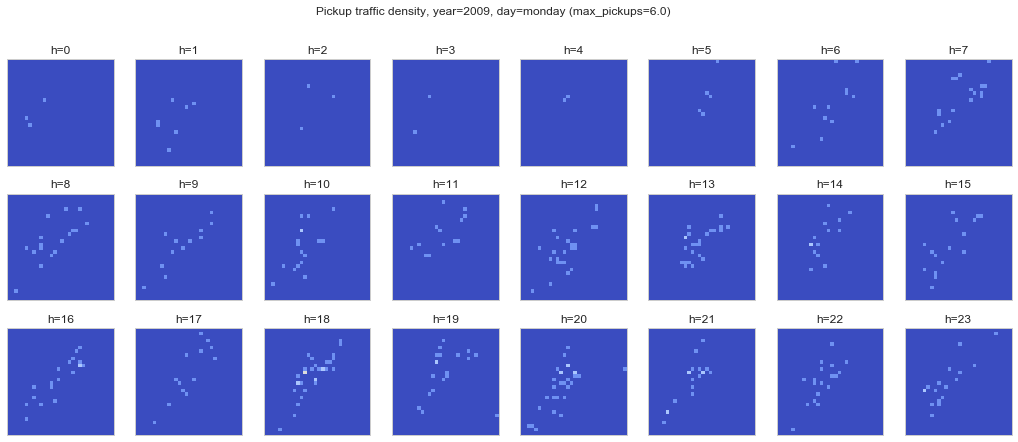

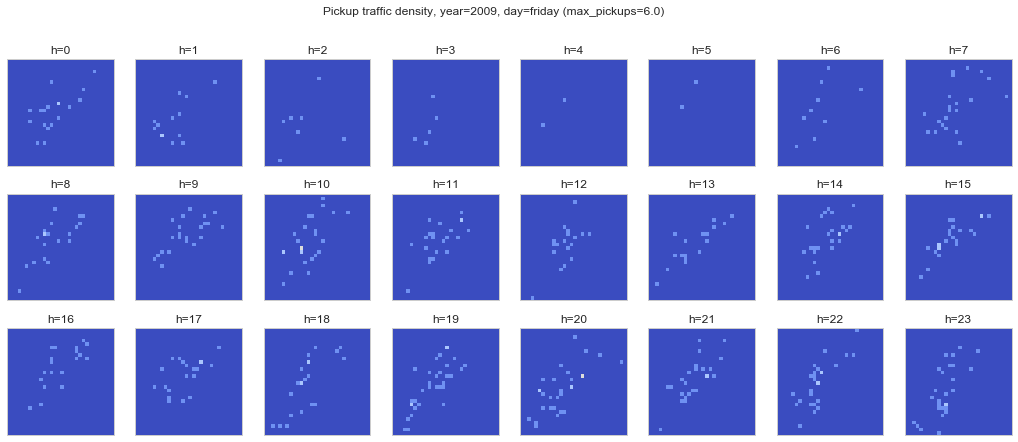

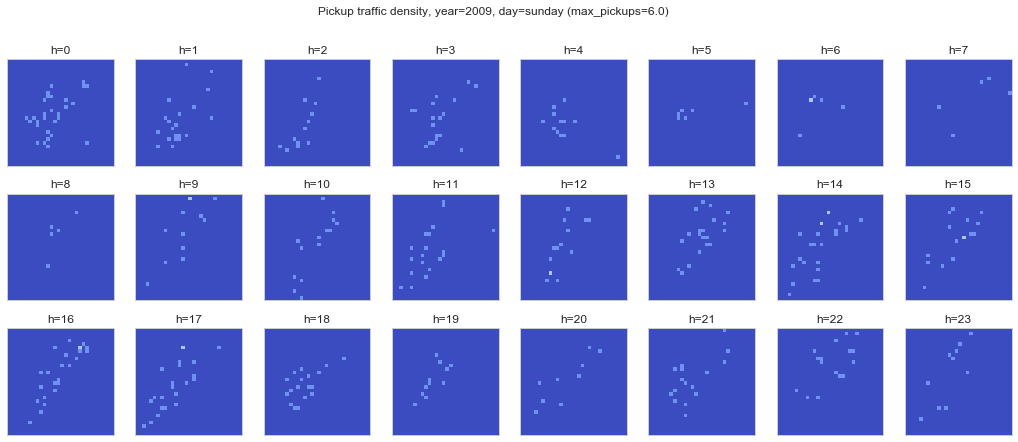

In [97]:
plot_traffic(traffic, 2009, 'monday')
plot_traffic(traffic, 2009, 'friday')
plot_traffic(traffic, 2009, 'sunday')

D:\programFile\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


count    19541.000000
mean         2.062113
std          2.211289
min          0.000000
25%          0.784200
50%          1.353342
75%          2.420243
max         27.122079
Name: distance_miles, dtype: float64

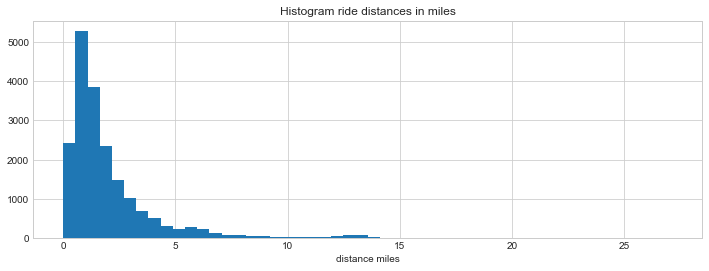

In [98]:
# Distance and time visualisations
# add new column to dataframe with distance in miles
df_train['distance_miles'] = distance(df_train.pickup_latitude, df_train.pickup_longitude, \
                                      df_train.dropoff_latitude, df_train.dropoff_longitude)

df_train.distance_miles.hist(bins=50, figsize=(12,4))
plt.xlabel('distance miles')
plt.title('Histogram ride distances in miles')
df_train.distance_miles.describe()


In [100]:
df_train.groupby('passenger_count')['distance_miles', 'fare_amount'].mean()

distance_miles  fare_amount
passenger_count                             
0                      1.857487     9.452055
1                      2.030327    11.087147
2                      2.186426    12.014574
3                      2.085000    11.427642
4                      2.151292    11.621022
5                      2.110693    11.112947
6                      1.999823    11.483784

In [101]:
print("Average $USD/Mile : {:0.2f}".format(df_train.fare_amount.sum()/df_train.distance_miles.sum()))

Average $USD/Mile : 5.46


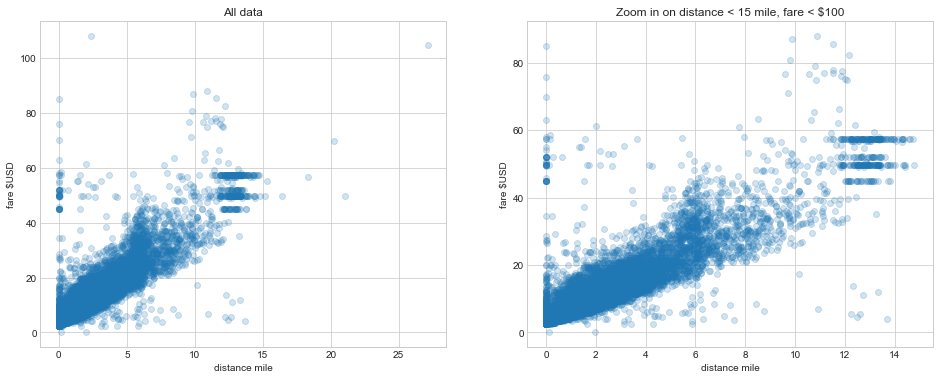

In [102]:
# scatter plot distance - fare
fig, axs = plt.subplots(1, 2, figsize=(16,6))
axs[0].scatter(df_train.distance_miles, df_train.fare_amount, alpha=0.2)
axs[0].set_xlabel('distance mile')
axs[0].set_ylabel('fare $USD')
axs[0].set_title('All data')

# zoom in on part of data
idx = (df_train.distance_miles < 15) & (df_train.fare_amount < 100)
axs[1].scatter(df_train[idx].distance_miles, df_train[idx].fare_amount, alpha=0.2)
axs[1].set_xlabel('distance mile')
axs[1].set_ylabel('fare $USD')
axs[1].set_title('Zoom in on distance < 15 mile, fare < $100');

In [103]:
# remove datapoints with distance <0.05 miles
idx = (df_train.distance_miles >= 0.05)
print('old size: ', len(df_train))
df_train = df_train[idx]
print('new size: ', len(df_train))

old size:  19541
new size:  19243


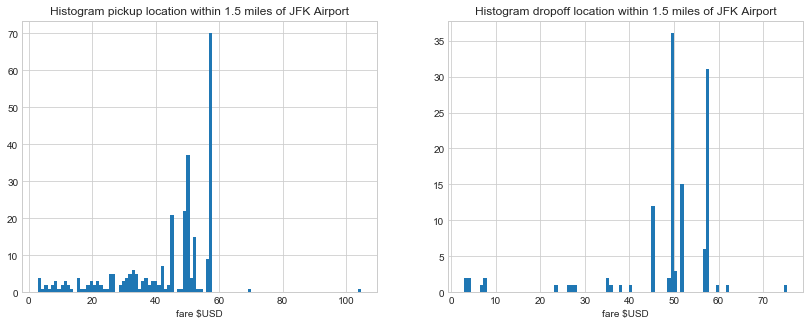

In [104]:
# JFK airport coordinates, see https://www.travelmath.com/airport/JFK
jfk = (-73.7822222222, 40.6441666667)
nyc = (-74.0063889, 40.7141667)

def plot_location_fare(loc, name, range=1.5):
    # select all datapoints with dropoff location within range of airport
    fig, axs = plt.subplots(1, 2, figsize=(14, 5))
    idx = (distance(df_train.pickup_latitude, df_train.pickup_longitude, loc[1], loc[0]) < range)
    df_train[idx].fare_amount.hist(bins=100, ax=axs[0])
    axs[0].set_xlabel('fare $USD')
    axs[0].set_title('Histogram pickup location within {} miles of {}'.format(range, name))

    idx = (distance(df_train.dropoff_latitude, df_train.dropoff_longitude, loc[1], loc[0]) < range)
    df_train[idx].fare_amount.hist(bins=100, ax=axs[1])
    axs[1].set_xlabel('fare $USD')
    axs[1].set_title('Histogram dropoff location within {} miles of {}'.format(range, name));
    
plot_location_fare(jfk, 'JFK Airport')

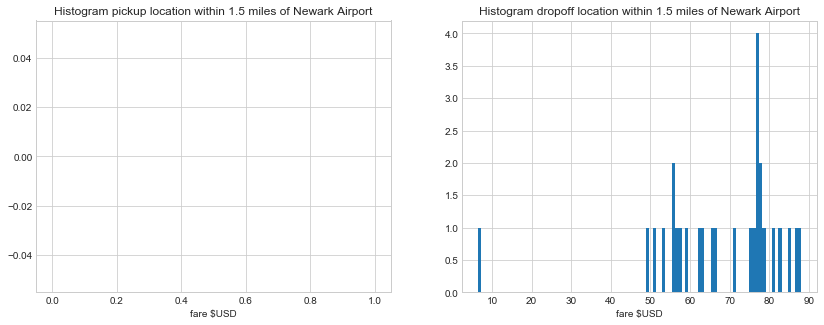

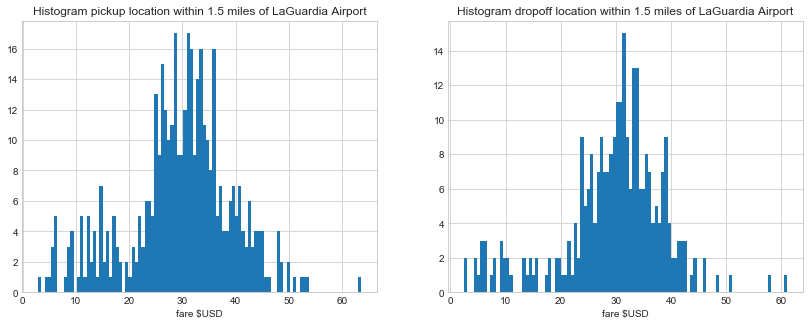

In [105]:
ewr = (-74.175, 40.69) # Newark Liberty International Airport, see https://www.travelmath.com/airport/EWR
lgr = (-73.87, 40.77) # LaGuardia Airport, see https://www.travelmath.com/airport/LGA
plot_location_fare(ewr, 'Newark Airport')
plot_location_fare(lgr, 'LaGuardia Airport')

In [106]:
df_train['fare_per_mile'] = df_train.fare_amount / df_train.distance_miles
df_train.fare_per_mile.describe()

count    19243.000000
mean         7.398884
std         11.987646
min          0.000000
25%          4.760443
50%          6.109164
75%          8.039085
max        918.738872
Name: fare_per_mile, dtype: float64

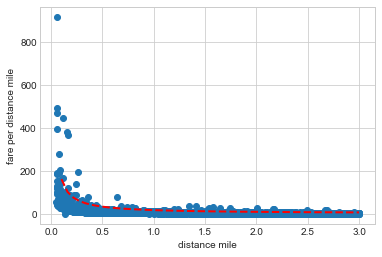

In [107]:
idx = (df_train.distance_miles < 3) & (df_train.fare_amount < 100)
plt.scatter(df_train[idx].distance_miles, df_train[idx].fare_per_mile)
plt.xlabel('distance mile')
plt.ylabel('fare per distance mile')

# theta here is estimated by hand
theta = (16, 4.0)
x = np.linspace(0.1, 3, 50)
plt.plot(x, theta[0]/x + theta[1], '--', c='r', lw=2);

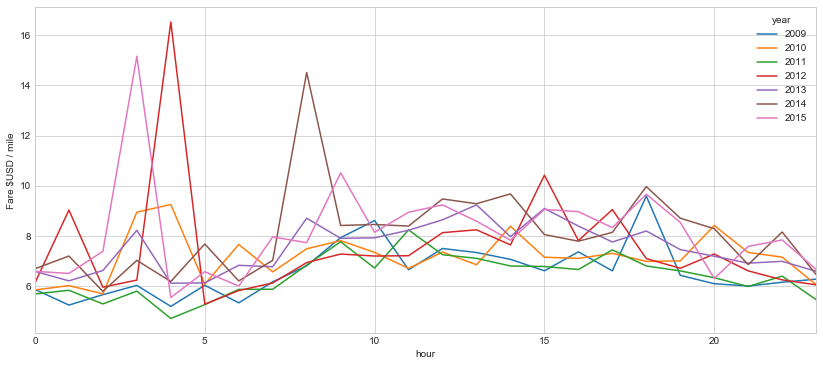

In [108]:
# display pivot table
df_train.pivot_table('fare_per_mile', index='hour', columns='year').plot(figsize=(14,6))
plt.ylabel('Fare $USD / mile');

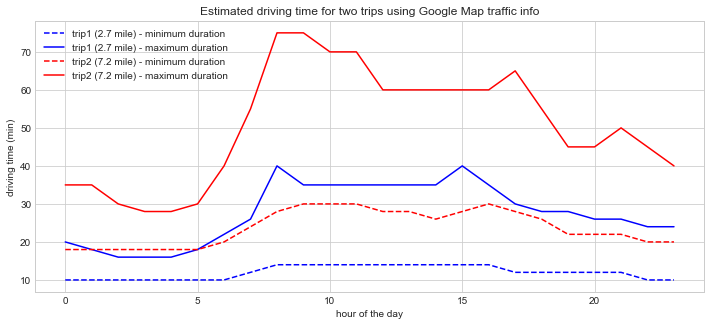

In [109]:
hours = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, \
         13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]

# minimum & maximum duration in minutes
trip1_min = [10, 10, 10, 10, 10, 10, 10, 12, 14, 14, 14, 14, \
             14, 14, 14, 14, 14, 12, 12, 12, 12, 12, 10, 10]
trip1_max = [20, 18, 16, 16, 16, 18, 22, 26, 40, 35, 35, 35, \
             35, 35, 35, 40, 35, 30, 28, 28, 26, 26, 24, 24]

trip2_min = [18, 18, 18, 18, 18, 18, 20, 24, 28, 30, 30, 30, \
             28, 28, 26, 28, 30, 28, 26, 22, 22, 22, 20, 20]
trip2_max = [35, 35, 30, 28, 28, 30, 40, 55, 75, 75, 70, 70, \
             60, 60, 60, 60, 60, 65, 55, 45, 45, 50, 45, 40]

plt.figure(figsize=(12, 5))
plt.plot(hours, trip1_min, '--', c='b', label="trip1 (2.7 mile) - minimum duration")
plt.plot(hours, trip1_max, '-', c='b', label="trip1 (2.7 mile) - maximum duration")
plt.plot(hours, trip2_min, '--', c='r', label="trip2 (7.2 mile) - minimum duration")
plt.plot(hours, trip2_max, '-', c='r', label="trip2 (7.2 mile) - maximum duration")
plt.xlabel('hour of the day')
plt.ylabel('driving time (min)')
plt.title('Estimated driving time for two trips using Google Map traffic info')
plt.legend();

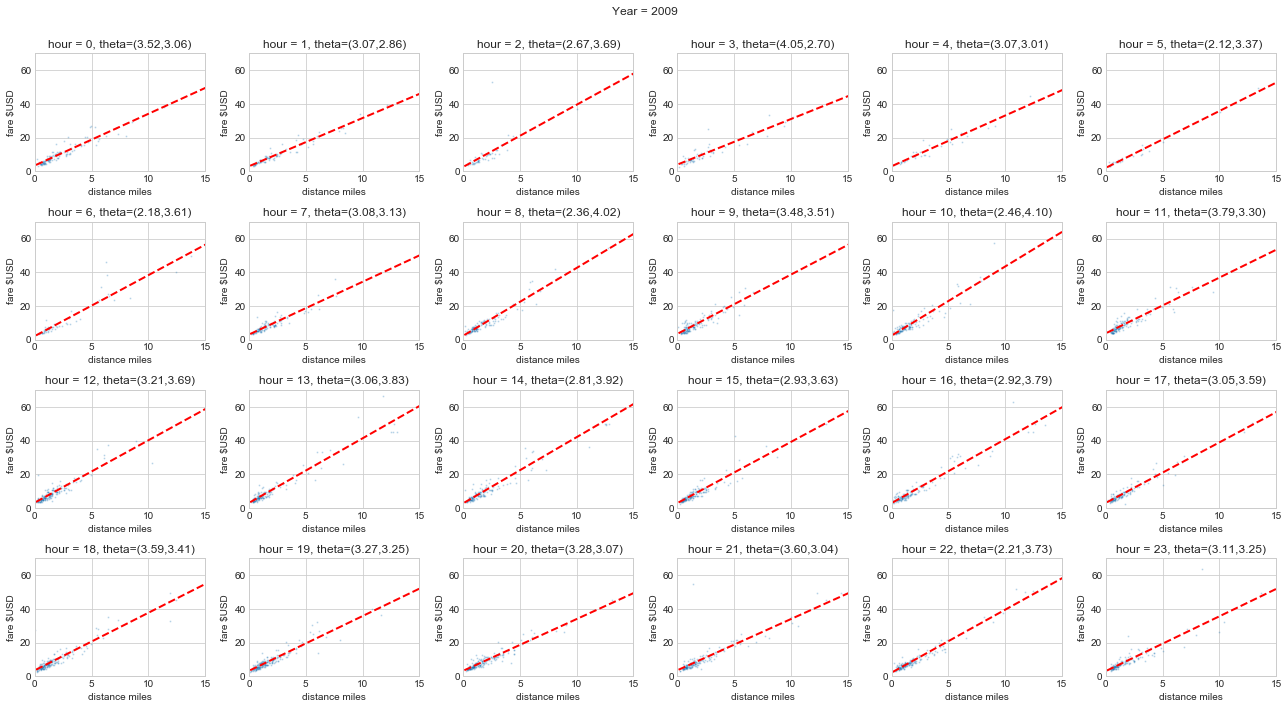

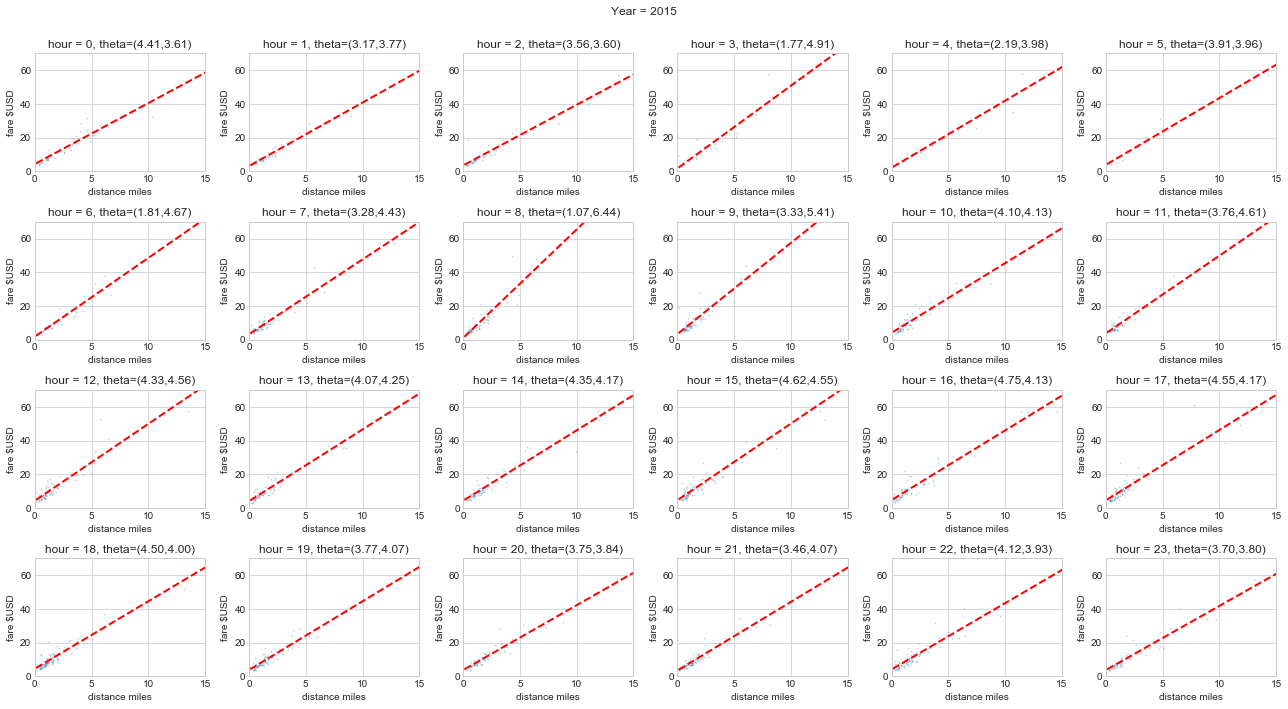

In [110]:
# A more in-depth analysis of the fare / time dependency is illustrated below. Here, I calculate per year and per hour the fare and do a linear regression. When investigating the plots, you clearly see the price increase over the years.
from sklearn.linear_model import LinearRegression

# plot all years
for year in [2009,2015]: #df_train.year.unique():
    # create figure
    fig, axs = plt.subplots(4, 6, figsize=(18, 10))
    axs = axs.ravel()
    
    # plot for all hours
    for h in range(24):
        idx = (df_train.distance_miles < 15) & (df_train.fare_amount < 100) & (df_train.hour == h) & \
              (df_train.year == year)
        axs[h].scatter(df_train[idx].distance_miles, df_train[idx].fare_amount, alpha=0.2, s=1)
        axs[h].set_xlabel('distance miles')
        axs[h].set_ylabel('fare $USD')
        axs[h].set_xlim((0, 15))
        axs[h].set_ylim((0, 70))

        model = LinearRegression(fit_intercept=False)
        x, y = df_train[idx].distance_miles.values.reshape(-1,1), df_train[idx].fare_amount.values.reshape(-1,1)
        X = np.concatenate((np.ones(x.shape), x), axis=1)
        model.fit(X, y)
        xx = np.linspace(0.1, 25, 100)
        axs[h].plot(xx, model.coef_[0][0] + xx * model.coef_[0][1], '--', c='r', lw=2)
        axs[h].set_title('hour = {}, theta=({:0.2f},{:0.2f})'.format(h, model.coef_[0][0], model.coef_[0][1]))

    plt.suptitle("Year = {}".format(year))
    plt.tight_layout(rect=[0, 0, 1, 0.95]);


In [111]:
# add new column to dataframe with distance in mile
df_train['distance_to_center'] = distance(nyc[1], nyc[0], df_train.pickup_latitude, df_train.pickup_longitude)

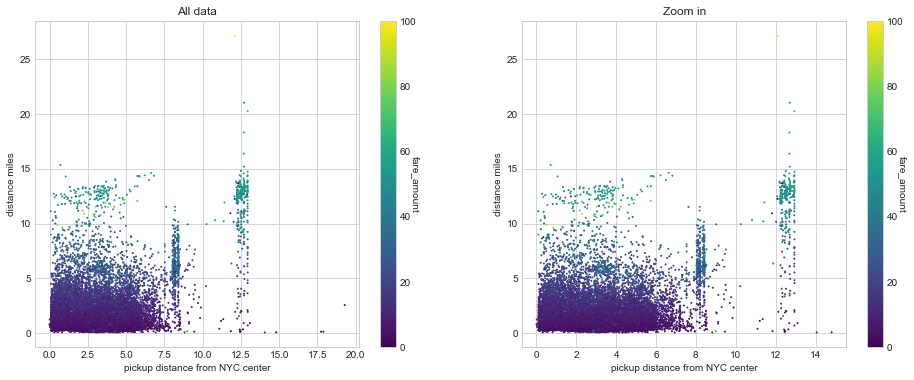

In [112]:
fig, axs = plt.subplots(1, 2, figsize=(16,6))
im = axs[0].scatter(df_train.distance_to_center, df_train.distance_miles, c=np.clip(df_train.fare_amount, 0, 100), 
                     cmap='viridis', alpha=1.0, s=1)
axs[0].set_xlabel('pickup distance from NYC center')
axs[0].set_ylabel('distance miles')
axs[0].set_title('All data')
cbar = fig.colorbar(im, ax=axs[0])
cbar.ax.set_ylabel('fare_amount', rotation=270)

idx = (df_train.distance_to_center < 15) & (df_train.distance_miles < 35)
im = axs[1].scatter(df_train[idx].distance_to_center, df_train[idx].distance_miles, 
                     c=np.clip(df_train[idx].fare_amount, 0, 100), cmap='viridis', alpha=1.0, s=1)
axs[1].set_xlabel('pickup distance from NYC center')
axs[1].set_ylabel('distance miles')
axs[1].set_title('Zoom in')
cbar = fig.colorbar(im, ax=axs[1])
cbar.ax.set_ylabel('fare_amount', rotation=270);

In [113]:
df_train['pickup_distance_to_jfk'] = distance(jfk[1], jfk[0], df_train.pickup_latitude, df_train.pickup_longitude)
df_train['dropoff_distance_to_jfk'] = distance(jfk[1], jfk[0], df_train.dropoff_latitude, df_train.dropoff_longitude)

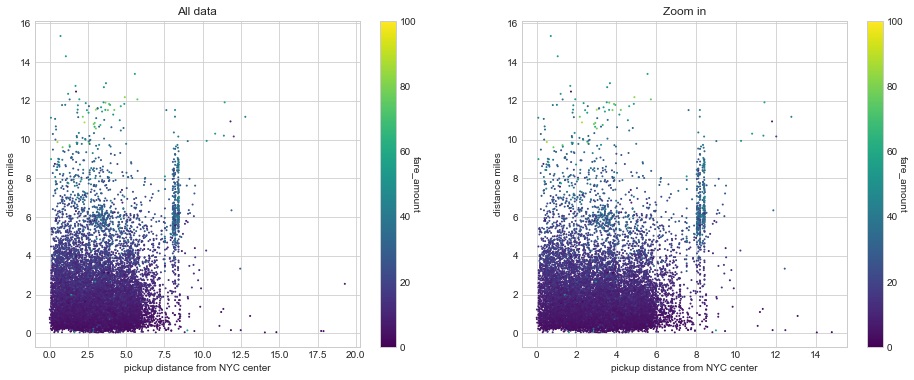

In [114]:
# remove all to/from JFK trips
idx = ~((df_train.pickup_distance_to_jfk < 1) | (df_train.dropoff_distance_to_jfk < 1))

fig, axs = plt.subplots(1, 2, figsize=(16,6))
im = axs[0].scatter(df_train[idx].distance_to_center, df_train[idx].distance_miles, 
                    c=np.clip(df_train[idx].fare_amount, 0, 100), 
                     cmap='viridis', alpha=1.0, s=1)
axs[0].set_xlabel('pickup distance from NYC center')
axs[0].set_ylabel('distance miles')
axs[0].set_title('All data')
cbar = fig.colorbar(im, ax=axs[0])
cbar.ax.set_ylabel('fare_amount', rotation=270)

idx1 = idx & (df_train.distance_to_center < 15) & (df_train.distance_miles < 35)
im = axs[1].scatter(df_train[idx1].distance_to_center, df_train[idx1].distance_miles, 
                     c=np.clip(df_train[idx1].fare_amount, 0, 100), cmap='viridis', alpha=1.0, s=1)
axs[1].set_xlabel('pickup distance from NYC center')
axs[1].set_ylabel('distance miles')
axs[1].set_title('Zoom in')
cbar = fig.colorbar(im, ax=axs[1])
cbar.ax.set_ylabel('fare_amount', rotation=270);

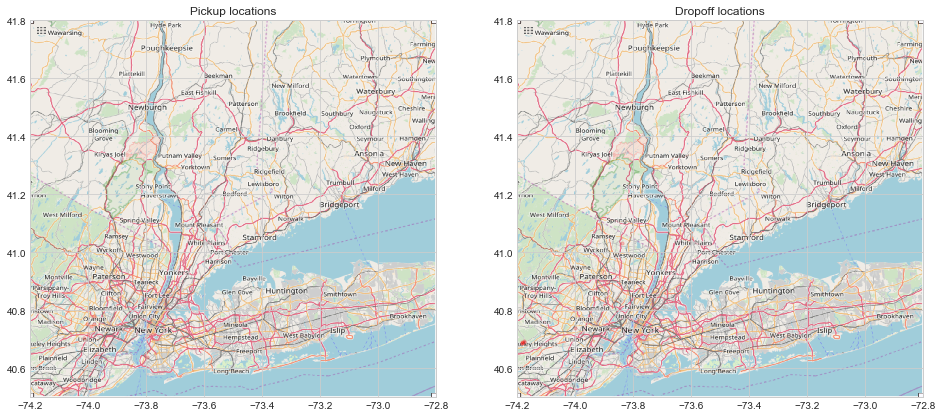

In [115]:
idx = (df_train.fare_amount>80) & (df_train.distance_miles<35) 
plot_on_map(df_train[idx], BB, nyc_map)

In [116]:
# remove newwark airport
df_train['pickup_distance_to_ewr'] = distance(ewr[1], ewr[0], df_train.pickup_latitude, df_train.pickup_longitude)
df_train['dropoff_distance_to_ewr'] = distance(ewr[1], ewr[0], df_train.dropoff_latitude, df_train.dropoff_longitude)
df_train['pickup_distance_to_lgr'] = distance(lgr[1], lgr[0], df_train.pickup_latitude, df_train.pickup_longitude)
df_train['dropoff_distance_to_lgr'] = distance(lgr[1], lgr[0], df_train.dropoff_latitude, df_train.dropoff_longitude)

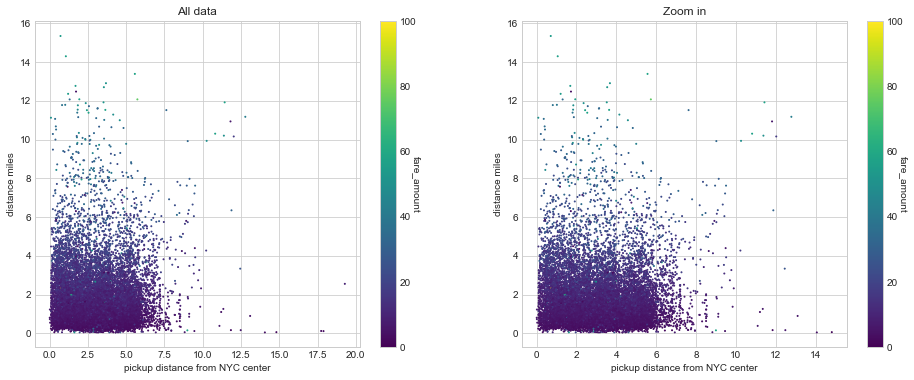

In [117]:
# remove all to/from airport trips
idx = ~((df_train.pickup_distance_to_jfk < 1) | (df_train.dropoff_distance_to_jfk < 1) |
        (df_train.pickup_distance_to_ewr < 1) | (df_train.dropoff_distance_to_ewr < 1) |
        (df_train.pickup_distance_to_lgr < 1) | (df_train.dropoff_distance_to_lgr < 1))

fig, axs = plt.subplots(1, 2, figsize=(16,6))
im = axs[0].scatter(df_train[idx].distance_to_center, df_train[idx].distance_miles, 
                    c=np.clip(df_train[idx].fare_amount, 0, 100), 
                     cmap='viridis', alpha=1.0, s=1)
axs[0].set_xlabel('pickup distance from NYC center')
axs[0].set_ylabel('distance miles')
axs[0].set_title('All data')
cbar = fig.colorbar(im, ax=axs[0])
cbar.ax.set_ylabel('fare_amount', rotation=270)

idx1 = idx & (df_train.distance_to_center < 15) & (df_train.distance_miles < 35)
im = axs[1].scatter(df_train[idx1].distance_to_center, df_train[idx1].distance_miles, 
                     c=np.clip(df_train[idx1].fare_amount, 0, 100), cmap='viridis', alpha=1.0, s=1)
axs[1].set_xlabel('pickup distance from NYC center')
axs[1].set_ylabel('distance miles')
axs[1].set_title('Zoom in')
cbar = fig.colorbar(im, ax=axs[1])
cbar.ax.set_ylabel('fare_amount', rotation=270);

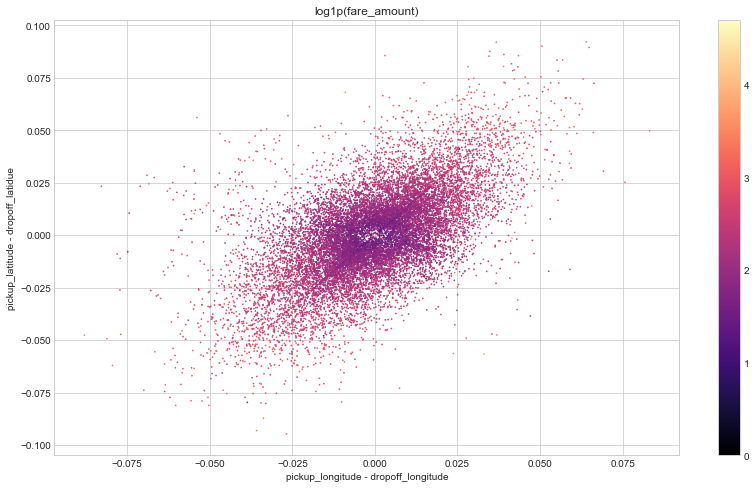

In [118]:
# Relevance of direction for fare amount¶

df_train['delta_lon'] = df_train.pickup_longitude - df_train.dropoff_longitude
df_train['delta_lat'] = df_train.pickup_latitude - df_train.dropoff_latitude

# Select trips in Manhattan
BB_manhattan = (-74.025, -73.925, 40.7, 40.8)
idx_manhattan = select_within_boundingbox(df_train, BB_manhattan)

plt.figure(figsize=(14,8))
plt.scatter(df_train[idx_manhattan].delta_lon, df_train[idx_manhattan].delta_lat, s=0.5, alpha=1.0, 
            c=np.log1p(df_train[idx_manhattan].fare_amount), cmap='magma')
plt.colorbar()
plt.xlabel('pickup_longitude - dropoff_longitude')
plt.ylabel('pickup_latitude - dropoff_latidue')
plt.title('log1p(fare_amount)');

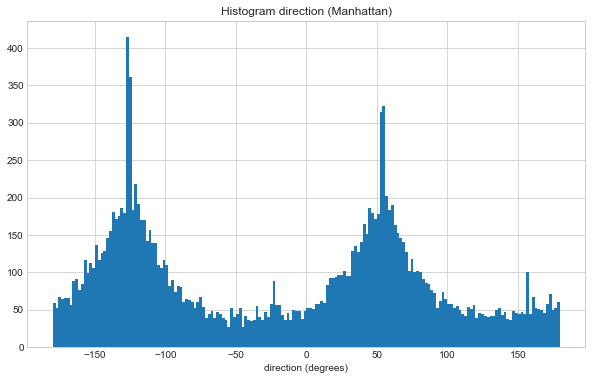

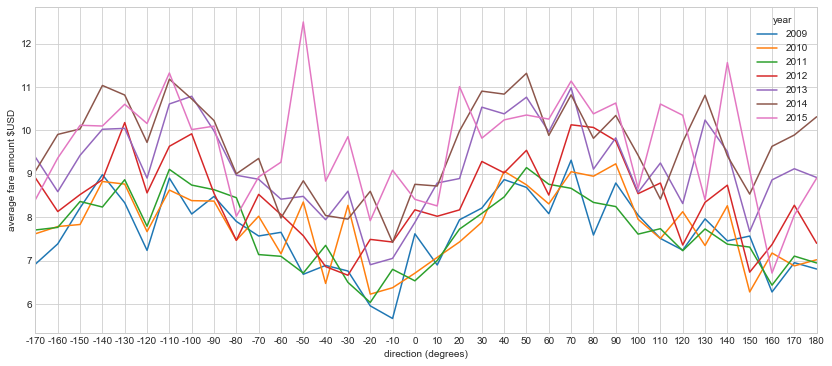

In [119]:
# direction of a trip, from 180 to -180 degrees. Horizontal axes = 0 degrees.
def calculate_direction(d_lon, d_lat):
    result = np.zeros(len(d_lon))
    l = np.sqrt(d_lon**2 + d_lat**2)
    result[d_lon>0] = (180/np.pi)*np.arcsin(d_lat[d_lon>0]/l[d_lon>0])
    idx = (d_lon<0) & (d_lat>0)
    result[idx] = 180 - (180/np.pi)*np.arcsin(d_lat[idx]/l[idx])
    idx = (d_lon<0) & (d_lat<0)
    result[idx] = -180 - (180/np.pi)*np.arcsin(d_lat[idx]/l[idx])
    return result

df_train['direction'] = calculate_direction(df_train.delta_lon, df_train.delta_lat)

# plot histogram of directions
plt.figure(figsize=(10,6))
df_train[idx_manhattan].direction.hist(bins=180)
plt.xlabel('direction (degrees)')
plt.title('Histogram direction (Manhattan)')

# plot direction vs average fare amount
fig, ax = plt.subplots(1, 1, figsize=(14,6))
direc = pd.cut(df_train[idx_manhattan]['direction'], np.linspace(-180, 180, 37))
df_train[idx_manhattan].pivot_table('fare_amount', index=[direc], columns='year', aggfunc='mean').plot(ax=ax)
plt.xlabel('direction (degrees)')
plt.xticks(range(36), np.arange(-170, 190, 10))
plt.ylabel('average fare amount $USD');

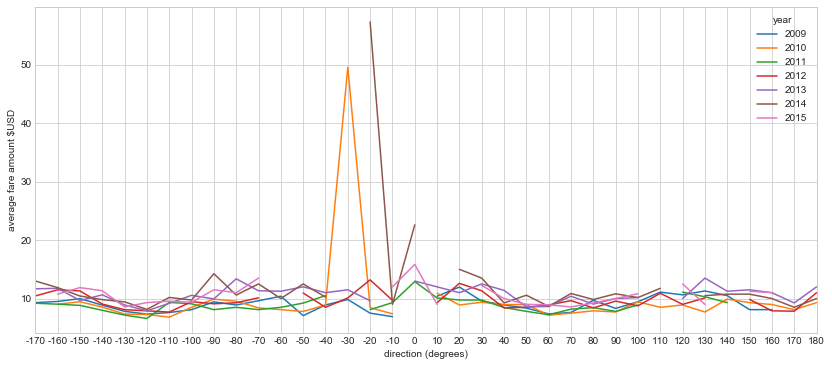

In [120]:
# select trips in Manhattan with +/- 2 miles distance drive
idx2 = idx_manhattan & (df_train.distance_miles>1.5) & (df_train.distance_miles<1.7)

# plot direction vs average fare amount
fig, ax = plt.subplots(1, 1, figsize=(14,6))
direc = pd.cut(df_train[idx2]['direction'], np.linspace(-180, 180, 37))
df_train[idx2].pivot_table('fare_amount', index=[direc], columns='year', aggfunc='mean').plot(ax=ax)
plt.xlabel('direction (degrees)')
plt.xticks(range(36), np.arange(-170, 190, 10))
plt.ylabel('average fare amount $USD');

In [121]:
# add new column to dataframe with distance in km
df_test['distance_miles'] = distance(df_test.pickup_latitude, df_test.pickup_longitude, \
                                     df_test.dropoff_latitude, df_test.dropoff_longitude)
df_test['distance_to_center'] = distance(nyc[1], nyc[0], \
                                          df_test.dropoff_latitude, df_test.dropoff_longitude)
df_test['hour'] = df_test.pickup_datetime.apply(lambda t: pd.to_datetime(t).hour)
df_test['year'] = df_test.pickup_datetime.apply(lambda t: pd.to_datetime(t).year)

In [122]:
# Model

In [123]:
# define dataset
# select points 15 miles near NYC center and remove zero passenger datapoints
idx = (df_train.distance_to_center<15) & (df_train.passenger_count!=0)
features = ['year', 'hour', 'distance_miles', 'passenger_count']
X = df_train[idx][features].values
y = df_train[idx]['fare_amount'].values

In [124]:
X.shape, y.shape

((19168, 4), (19168,))

In [125]:
# define some handy analysis support function
from sklearn.metrics import mean_squared_error, explained_variance_score

def plot_prediction_analysis(y, y_pred, figsize=(10,4), title=''):
    fig, axs = plt.subplots(1, 2, figsize=figsize)
    axs[0].scatter(y, y_pred)
    mn = min(np.min(y), np.min(y_pred))
    mx = max(np.max(y), np.max(y_pred))
    axs[0].plot([mn, mx], [mn, mx], c='red')
    axs[0].set_xlabel('$y$')
    axs[0].set_ylabel('$\hat{y}$')
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    evs = explained_variance_score(y, y_pred)
    axs[0].set_title('rmse = {:.2f}, evs = {:.2f}'.format(rmse, evs))
    
    axs[1].hist(y-y_pred, bins=50)
    avg = np.mean(y-y_pred)
    std = np.std(y-y_pred)
    axs[1].set_xlabel('$y - \hat{y}$')
    axs[1].set_title('Histrogram prediction error, $\mu$ = {:.2f}, $\sigma$ = {:.2f}'.format(avg, std))
    
    if title!='':
        fig.suptitle(title)

In [126]:
# create training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

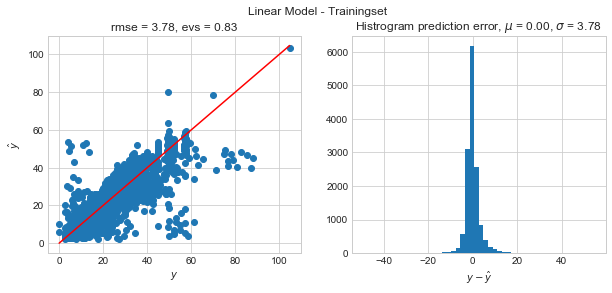

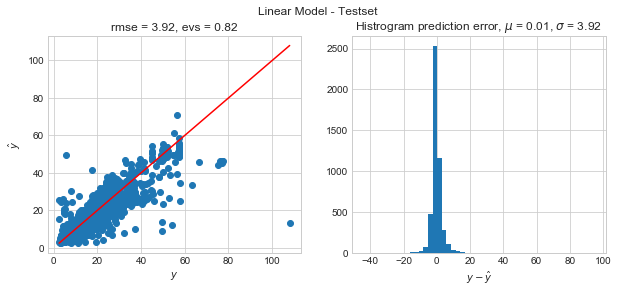

In [127]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

model_lin = Pipeline((
        ("standard_scaler", StandardScaler()),
        ("lin_reg", LinearRegression()),
    ))
model_lin.fit(X_train, y_train)

y_train_pred = model_lin.predict(X_train)
plot_prediction_analysis(y_train, y_train_pred, title='Linear Model - Trainingset')

y_test_pred = model_lin.predict(X_test)
plot_prediction_analysis(y_test, y_test_pred, title='Linear Model - Testset')

In [128]:
# some handy function to see how sensitive the model is to the selection
# of the training and test set
def plot_rmse_analysis(model, X, y, N=400, test_size=0.25, figsize=(10,4), title=''):
    rmse_train, rmse_test = [], []
    for i in range(N):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        rmse_train.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
        rmse_test.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))

    g = sns.jointplot(np.array(rmse_train), np.array(rmse_test), kind='scatter', stat_func=None, size=5)
    g.set_axis_labels("RMSE training ($\mu$={:.2f})".format(np.mean(rmse_train)), 
                      "RMSE test ($\mu$={:.2f})".format(np.mean(rmse_test)))
    plt.subplots_adjust(top=0.9)
    g.fig.suptitle('{} (N={}, test_size={:0.2f})'.format(title, N, test_size))

D:\programFile\Anaconda\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


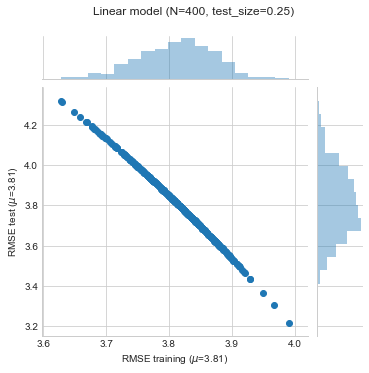

In [129]:
# only 100k points are used to shorten calculation time
plot_rmse_analysis(model_lin, X, y, title='Linear model')

In [130]:
# define dataset
XTEST = df_test[features].values

In [131]:
filename = './output/baseline_linear'

y_pred_final = model_lin.predict(XTEST)

submission = pd.DataFrame(
    {'key': df_test.key, 'fare_amount': y_pred_final},
    columns = ['key', 'fare_amount'])
submission.to_csv('submission.csv', index = False)